<a href="https://colab.research.google.com/github/itimes-digital/maratona_ibm/blob/master/analise_algar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
dataset = pd.read_csv('sample_data/algar-dataset-treino.csv')
dataset.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,M,79,3,1,Tecnico,4,Solteiro,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,F,81,4,1,Tecnico,1,Casado,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


In [4]:
dataset.describe()

,Idade,Pontuação teste,Distancia casa-trabalho,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
count,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,37.030657,807.249635,9.105109,1.0,1012.276642,2.729927,65.807299,2.745985,2.081752,2.723358,6572.754745,14296.439416,2.703650,1.0,15.174453,3.150365,2.720438,80.0,0.804380,11.357664,2.800730,2.769343,7.031387,4.244526,2.206569,4.141606
std,9.196528,404.400662,7.992457,0.0,569.946647,1.091863,20.389902,0.706643,1.113974,1.107829,4755.773452,7122.797449,2.499333,0.0,3.629208,0.357559,1.079704,0.0,0.851919,7.849234,1.282745,0.704319,6.127907,3.617897,3.220930,3.578049
min,18.000000,102.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,1.0,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.250000,2.000000,1.0,516.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2932.250000,8009.750000,1.000000,1.0,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,806.000000,7.000000,1.0,1014.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4955.000000,14225.500000,2.000000,1.0,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.750000,14.000000,1.0,1512.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8437.500000,20456.250000,4.000000,1.0,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,1.0,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
dataset['Local de trabalho'].unique()

array(['Cliente', 'Misto', 'Escritório'], dtype=object)

In [ ]:
dataset['Area'].unique()

[Ciências das natureza, Medicina, Outros, Marketing, Faculdade Técnica, Ciências humanas]
Categories (6, object): [Ciências das natureza, Medicina, Outros, Marketing, Faculdade Técnica,
                         Ciências humanas]

In [ ]:
dataset['Contratar'].unique()

array(['Não', 'Sim'], dtype=object)

In [ ]:
dataset['Educacao'].unique()

array(['Médio completo', 'Superior incompleto - cursando',
       'Superior incompleto', 'Superior completo', 'Pós-gradução'],
      dtype=object)

In [ ]:
dataset['Necessita de hora extra'].unique()

[Não, Sim]
Categories (2, object): [Não, Sim]

In [ ]:
dataset_novo['Contratar'].unique()

[Não, Sim]
Categories (2, object): [Não, Sim]

In [20]:
dataset_novo['Horas de trabalho padrão'].unique()

array([80])

In [22]:
dataset_novo = dataset

In [26]:
dataset_categoria = dataset_novo[['Necessita de hora extra', 'Area', 
                                 'Local de trabalho','Genero','Educacao',
                                 'Departmento','Cargo','Estado civil']]
dataset_categoria.head()

,Necessita de hora extra,Area,Local de trabalho,Genero,Educacao,Departmento,Cargo,Estado civil
0,Não,Ciências das natureza,Cliente,M,Médio completo,Engenharia,Engenheiro,Casado
1,Sim,Ciências das natureza,Misto,F,Superior incompleto - cursando,Engenharia,Engenheiro,Casado
2,Não,Medicina,Cliente,M,Médio completo,Engenharia,Tecnico,Casado
3,Não,Ciências das natureza,Misto,M,Superior incompleto,Engenharia,Tecnico,Solteiro
4,Sim,Medicina,Misto,F,Superior completo,Engenharia,Tecnico,Casado


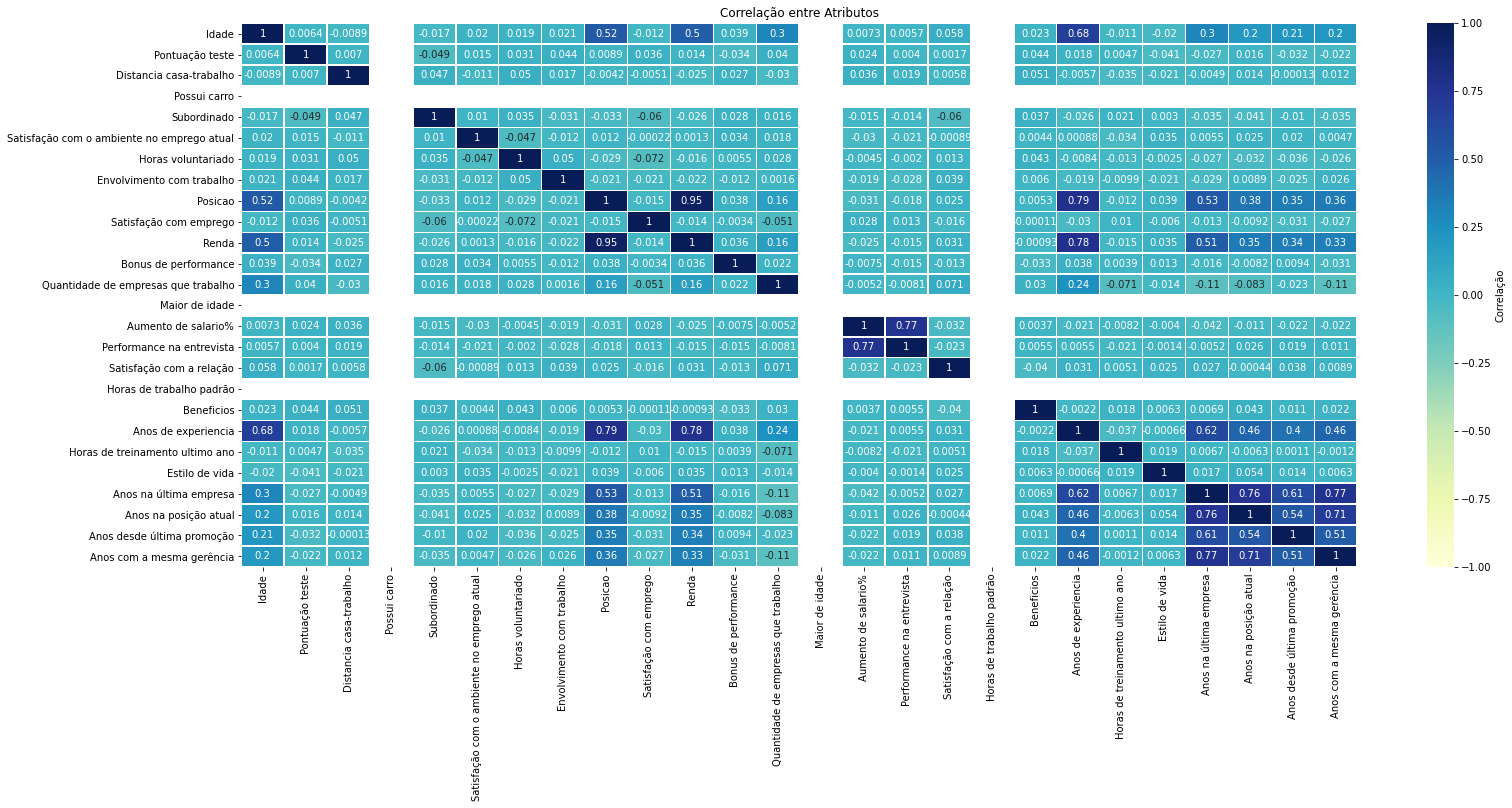

In [25]:
f, ax = plt.subplots(figsize=(25, 10))
plt.title("Correlação entre Atributos")
heat_map = sns.heatmap(dataset_novo.corr(), 
            annot=True, 
            vmin = -1,
            vmax = 1,
            linewidths=.5, 
            cmap="YlGnBu", 
            center=0, 
            ax=ax, 
            cbar_kws={'label': 'Correlação'})

heat_map.set_xticklabels(heat_map.get_xticklabels(), 
                         rotation=90, 
                         horizontalalignment='center')
plt.show()
#Renda, posição, idade, anos de experiência, anos da ultima empresa, anos na posição atual, anos na mesma gerencia, anos desde a ultima posicao

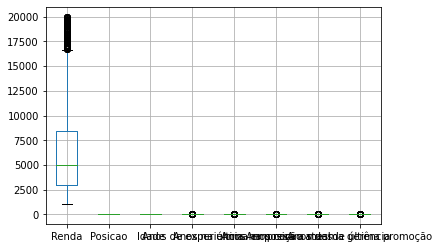

In [207]:

boxplot = dataset_novo.boxplot(column=['Renda', 'Posicao', 'Idade', 'Anos de experiencia', 
                                               'Anos na última empresa', 'Anos na posição atual', 
                                               'Anos com a mesma gerência', 'Anos desde última promoção'])

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [209]:
dataset_novo = dataset_categoria.join(dataset[['Renda', 'Posicao', 'Idade', 'Anos de experiencia', 
                                               'Anos na última empresa', 'Anos na posição atual', 
                                               'Anos com a mesma gerência', 'Anos desde última promoção']])#'Aumento de salario%',	'Performance na entrevista'

In [210]:
dataset_novo.head()

,Necessita de hora extra,Area,Local de trabalho,Genero,Educacao,Departmento,Cargo,Estado civil,Renda,Posicao,Idade,Anos de experiencia,Anos na última empresa,Anos na posição atual,Anos com a mesma gerência,Anos desde última promoção
0,Não,Ciências das natureza,Cliente,M,Médio completo,Engenharia,Engenheiro,Casado,5130,2,49,10,10,7,7,1
1,Sim,Ciências das natureza,Misto,F,Superior incompleto - cursando,Engenharia,Engenheiro,Casado,2909,1,33,8,8,7,0,3
2,Não,Medicina,Cliente,M,Médio completo,Engenharia,Tecnico,Casado,3468,1,27,6,2,2,2,2
3,Não,Ciências das natureza,Misto,M,Superior incompleto,Engenharia,Tecnico,Solteiro,3068,1,32,8,7,7,6,3
4,Sim,Medicina,Misto,F,Superior completo,Engenharia,Tecnico,Casado,2670,1,59,12,1,0,0,0


In [211]:
dataset['Contratar'].head()
dataset[["Contratar"]].describe()

,Contratar
count,1370
unique,2
top,Não
freq,1178


In [212]:
dataset.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Médio completo,Ciências das natureza,1,2,3,M,61,2,2,Engenheiro,2,Casado,5130,24907,1,1,Não,23,4,4,80,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Superior incompleto - cursando,Ciências das natureza,1,5,4,F,56,3,1,Engenheiro,3,Casado,2909,23159,1,1,Sim,11,3,3,80,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Médio completo,Medicina,1,7,1,M,40,3,1,Tecnico,2,Casado,3468,16632,9,1,Não,12,3,4,80,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Superior incompleto,Ciências das natureza,1,8,4,M,79,3,1,Tecnico,4,Solteiro,3068,11864,0,1,Não,13,3,3,80,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Superior completo,Medicina,1,10,3,F,81,4,1,Tecnico,1,Casado,2670,9964,4,1,Sim,20,4,1,80,3,12,3,2,1,0,0,0,Não


In [362]:
previsores = dataset_novo.values

classe = dataset.loc[:, 'Contratar'].values

In [363]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

In [364]:
labelEncoder_previsores = LabelEncoder()

In [365]:
previsores[:, 0] = labelEncoder_previsores.fit_transform(previsores[:,0])
previsores[:, 1] = labelEncoder_previsores.fit_transform(previsores[:,1])
previsores[:, 2] = labelEncoder_previsores.fit_transform(previsores[:,2])
previsores[:, 3] = labelEncoder_previsores.fit_transform(previsores[:,3])
previsores[:, 4] = labelEncoder_previsores.fit_transform(previsores[:,4])
previsores[:, 5] = labelEncoder_previsores.fit_transform(previsores[:,5])
previsores[:, 6] = labelEncoder_previsores.fit_transform(previsores[:,6])
previsores[:, 7] = labelEncoder_previsores.fit_transform(previsores[:,7])

In [366]:
from sklearn.compose import ColumnTransformer

In [367]:
column_transform = ColumnTransformer([("encoder", 
                         OneHotEncoder(), 
                        [0,1,2,3,4,5,6,7])],    
                       remainder = 'passthrough')

In [368]:
labelEncoder_classe = LabelEncoder()
classe = labelEncoder_classe.fit_transform(classe)

In [369]:
classe

array([0, 0, 0, ..., 1, 1, 1])

In [370]:
from sklearn.preprocessing import StandardScaler

In [371]:
scaler = StandardScaler()

previsores = scaler.fit_transform(previsores)

In [372]:
previsores.shape

(1370, 16)

In [373]:
#rus = RandomUnderSampler('all')
#previsores, classe = rus.fit_sample(previsores, classe)


In [394]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, 
                                classe, 
                                test_size=0.30,
                                random_state=30)

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import collections 

In [395]:
classificador = LogisticRegression()

In [377]:
from sklearn.ensemble import RandomForestClassifier
classificador = RandomForestClassifier(n_estimators=40,
                              criterion='entropy', 
                              random_state=0)

In [396]:
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [397]:
precisao = accuracy_score(classe_teste, previsoes)
precisao

0.8807785888077859

In [398]:
classificador.coef_

array([[ 0.69450924, -0.06484598, -0.11766394,  0.14999923, -0.04640271,
         0.24119325,  0.28591687,  0.29133814, -0.22072603, -0.36316328,
        -0.30817166,  0.23247864, -0.13122763, -0.42232768, -0.33601728,
         0.73028784]])

In [399]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[349,   5],
       [ 44,  13]])

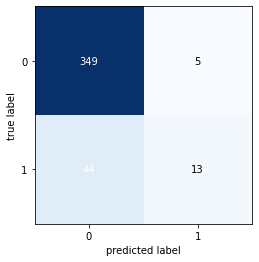

In [400]:
fig, ax = plot_confusion_matrix(conf_mat=matriz)
plt.show()

In [401]:
print(collections.Counter(classe_teste))

Counter({0: 354, 1: 57})


K-FOLD

In [258]:
from sklearn.model_selection import train_test_split

x = previsores
y = classe
x_train, x_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.33, random_state = 42)

In [302]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=45,
                              criterion='entropy', 
                              random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [303]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

rfc_acc = round(accuracy_score(y_test, y_pred), 6)
rfc_recall = round(recall_score(y_test, y_pred, average = 'weighted'), 6)
rfc_precision = round(precision_score(y_test, y_pred, average = 'weighted'), 6)

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [305]:
knn_acc = round(accuracy_score(y_test, y_pred), 6)
knn_recall = round(recall_score(y_test, y_pred, average='weighted'), 6)
knn_precision = round(precision_score(y_test, y_pred, average='weighted'), 6)

In [306]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)

In [307]:
lg_acc = round(accuracy_score(y_test, y_pred), 6)
lg_recall = round(recall_score(y_test, y_pred, average='weighted'), 6)
lg_precision = round(precision_score(y_test, y_pred, average='weighted'), 6)

In [308]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', 
                                       random_state = 0)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [309]:
dtc_acc = round(accuracy_score(y_test, y_pred), 6)
dtc_recall = round(recall_score(y_test, y_pred, average='weighted'), 6)
dtc_precision = round(precision_score(y_test, y_pred, average='weighted'), 6)

In [310]:
print("KNN vs Random Forests vs LogisticRegression vs DecisionTreeClassifier \n")
print("Classes: {0}\n".format(dataset['Contratar'].name))
print("Acurácia: {0} vs {1} vs {2} vs {3}".format(knn_acc, rfc_acc, lg_acc, dtc_acc))
print("Recall: {0} vs {1} vs {2} vs {3}".format(knn_recall, rfc_recall, lg_recall, dtc_recall))
print("Precisão: {0} vs {1} vs {2} vs {3}".format(knn_precision, rfc_precision, lg_precision, dtc_precision))

KNN vs Random Forests vs LogisticRegression vs DecisionTreeClassifier 

Classes: Contratar

Acurácia: 0.834437 vs 0.889625 vs 0.88521 vs 0.816777
Recall: 0.834437 vs 0.889625 vs 0.88521 vs 0.816777
Precisão: 0.80985 vs 0.875543 vs 0.867935 vs 0.847918


In [311]:
from sklearn.model_selection import cross_val_score

# Para especificar o k-fold, pode passar o parâmetro cv=valor numérico da quantidade
cv_rfc = cross_val_score(rfc, x, y)
cv_knn = cross_val_score(knn, x, y)
cv_lg = cross_val_score(knn, x, y)
cv_dtc = cross_val_score(knn, x, y)
print("\nValidação cruzada: {0} vs {1} vs {2} vs {3}".format(cv_knn, cv_rfc, cv_lg, cv_dtc))


Validação cruzada: [0.87956204 0.84671533 0.83941606 0.84306569 0.85766423] vs [0.86861314 0.87591241 0.88321168 0.8540146  0.86861314] vs [0.87956204 0.84671533 0.83941606 0.84306569 0.85766423] vs [0.87956204 0.84671533 0.83941606 0.84306569 0.85766423]


In [312]:
sum_cv_rfc = 0
for cv_score in cv_rfc:
  sum_cv_rfc += cv_score;

print("\nResultado Random Forest: {0}".format(sum_cv_rfc/5))


Resultado Random Forest: 0.87007299270073


In [313]:
sum_cv_knn = 0
for cv_score in cv_knn:
  sum_cv_knn += cv_score;

print("\nResultado KNN: {0}".format(sum_cv_knn/5))


Resultado KNN: 0.8532846715328468


In [314]:
sum_cv_lg = 0
for cv_score in cv_lg:
  sum_cv_lg += cv_score;

print("\nResultado KNN: {0}".format(sum_cv_lg/5))


Resultado KNN: 0.8532846715328468


In [315]:
sum_cv_dtc = 0
for cv_score in cv_dtc:
  sum_cv_dtc += cv_score;

print("\nResultado KNN: {0}".format(sum_cv_dtc/5))


Resultado KNN: 0.8532846715328468
